In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv

In [3]:
#CSV file paths

accident_path = "project_data/accident_df.csv"
vehicle_path = "project_data/vehicle_path_df.csv"
main_csv_path = "project_data/proj_accident_main.csv"


#creating dataframes 
main_df = pd.read_csv(main_csv_path)
vehicle_df = pd.read_csv(vehicle_path)
accident_df = pd.read_csv(accident_path)


#remove first column
main_df = main_df.drop(main_df.columns[0], axis=1)
vehicle_df = vehicle_df.drop(vehicle_df.columns[0], axis=1)
accident_df = accident_df.drop(accident_df.columns[0], axis=1)




c:\Users\Dog\anaconda3\envs\bootcamp\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (26,27,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
#converting accidentdate column to datetime format, for easier search
main_df["ACCIDENTDATE"] = pd.to_datetime(main_df["ACCIDENTDATE"])
#main_df["Year"] = main_df["ACCIDENTDATE"].dt.year

#creating dataframes for each year's accidents
main_2016_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2016]
main_2017_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2017]
main_2018_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2018]
main_2019_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2019]
main_2020_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2020]


# accident  dataframes based on year
accident_2016_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2016_df["ACCIDENT_NO"])]
accident_2017_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2017_df["ACCIDENT_NO"])]
accident_2018_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2018_df["ACCIDENT_NO"])]
accident_2019_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2019_df["ACCIDENT_NO"])]
accident_2020_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2020_df["ACCIDENT_NO"])]

# vehicle  dataframes based on year
vehicle_2016_df = vehicle_df[vehicle_df["ACCIDENT_NO"].isin(main_2016_df["ACCIDENT_NO"])]
vehicle_2017_df = vehicle_df[vehicle_df["ACCIDENT_NO"].isin(main_2017_df["ACCIDENT_NO"])]
vehicle_2018_df = vehicle_df[vehicle_df["ACCIDENT_NO"].isin(main_2018_df["ACCIDENT_NO"])]
vehicle_2019_df = vehicle_df[vehicle_df["ACCIDENT_NO"].isin(main_2019_df["ACCIDENT_NO"])]
vehicle_2020_df = vehicle_df[vehicle_df["ACCIDENT_NO"].isin(main_2020_df["ACCIDENT_NO"])]




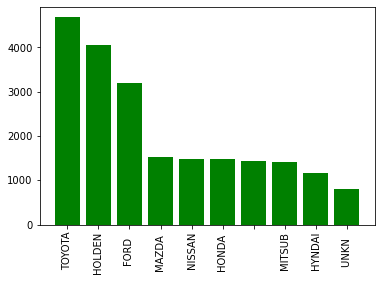

In [45]:
vehicle_2016_df = vehicle_2016_df[["ACCIDENT_NO", "VEHICLE_BODY_STYLE", "VEHICLE_MAKE", "VEHICLE_TYPE"]]
makes_2016 = vehicle_2016_df.groupby("VEHICLE_MAKE",as_index=False)["ACCIDENT_NO"].count()
makes_2016 = makes_2016.sort_values(by="ACCIDENT_NO", ascending=False)

plt.bar(makes_2016["VEHICLE_MAKE"].head(10), makes_2016["ACCIDENT_NO"].head(10), color='g', alpha=1, align="center")
plt.xticks(makes_2016["VEHICLE_MAKE"].head(10),makes_2016["VEHICLE_MAKE"].head(10), rotation="vertical")
plt.show()


In [43]:
makes_2016

,VEHICLE_MAKE,ACCIDENT_NO
197,TOYOTA,4677
81,HOLDEN,4050
64,FORD,3204
143,MAZDA,1517
157,NISSAN,1490
...,...,...
32,CASE,1
116,KENN,1
114,KATO,1
112,JOHNST,1
